##                                         Class Imbalance Treatment Churn Prediction

in this we have to exploring the various methods of the treating the class imbalnce by using the various methods are as follows :
Dataset used : churn prediction dataset from uci machine learning datasets.

dataset : https://github.com/waghvaishnav/Machine-Learning-Algorithms-and-Data-Processing-Playground-hub/blob/ca87ef8ec63286e4e902ca4e427e529109b8806d/churn.csv


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv("C:/Users/Vaishnav/OneDrive/Desktop/Datasets/Customer Churn.csv")
df = pd.DataFrame(data)
print(df.describe())



       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.2500

In [37]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [39]:
df.Churn.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn'>

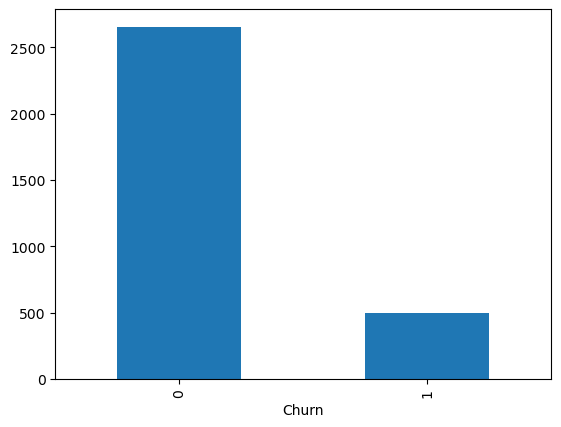

In [119]:
df.Churn.value_counts().plot(kind="bar")

In [41]:
x = df[['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value']]
y = df["Churn"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

here is the class imbalance 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       520
           1       0.53      0.26      0.35       110

    accuracy                           0.83       630
   macro avg       0.69      0.61      0.63       630
weighted avg       0.80      0.83      0.81       630



C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


due to the high false negative predictions recall is very low .

undersampling of the majority class  :

In [50]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


## undersampling 

In [56]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
                                            # due to data likage issues only provides trainning data to the model.
x_train_rus,y_train_rus = rus.fit_resample(x_train,y_train)
y_train_rus.value_counts()



Churn
0    385
1    385
Name: count, dtype: int64

here is the class value of both are in the same ratios.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train_rus,y_train_rus)
y_pred_rus = model.predict(x_test)

print(classification_report(y_test,y_pred_rus))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       520
           1       0.36      0.75      0.49       110

    accuracy                           0.73       630
   macro avg       0.65      0.74      0.65       630
weighted avg       0.83      0.73      0.76       630



C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Oversampling using Duplication :

In [82]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
                                            # due to data likage issues only provides trainning data to the model.
x_train_ros,y_train_ros = ros.fit_resample(x_train,y_train)
y_train_ros.value_counts()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train_rus,y_train_rus)
y_pred_rus = model.predict(x_test)

print(classification_report(y_test,y_pred_rus))


              precision    recall  f1-score   support

           0       0.93      0.72      0.81       520
           1       0.36      0.75      0.49       110

    accuracy                           0.73       630
   macro avg       0.65      0.74      0.65       630
weighted avg       0.83      0.73      0.76       630



C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Oversampling using SMOTE :

In [87]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
                                            # due to data likage issues only provides trainning data to the model.
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)
y_train_smt.value_counts()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train_smt,y_train_smt)
y_pred_smt = model.predict(x_test)

print(classification_report(y_test,y_pred_smt))


              precision    recall  f1-score   support

           0       0.94      0.72      0.81       520
           1       0.37      0.78      0.50       110

    accuracy                           0.73       630
   macro avg       0.65      0.75      0.66       630
weighted avg       0.84      0.73      0.76       630



C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ## Oversampling using SMOTE Tomek links :

In [94]:
from imblearn.combine import SMOTETomek
smtk = SMOTETomek(random_state=42)
                                            # due to data likage issues only provides trainning data to the model.
x_train_smtk,y_train_smtk = smtk.fit_resample(x_train,y_train)
y_train_smtk.value_counts()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train_smtk,y_train_smtk)
y_pred_smtk = model.predict(x_test)

print(classification_report(y_test,y_pred_smtk))


              precision    recall  f1-score   support

           0       0.93      0.72      0.81       520
           1       0.36      0.76      0.49       110

    accuracy                           0.72       630
   macro avg       0.65      0.74      0.65       630
weighted avg       0.83      0.72      0.75       630



C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Oversampling using SMOTE Tomek links :

In [107]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=42)
                                            # due to data likage issues only provides trainning data to the model.

model_brf = BalancedRandomForestClassifier()
model_brf.fit(x_train,y_train)
y_pred_brf = model.predict(x_test)

print(classification_report(y_test,y_pred_brf))


C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Vaishnav\anaconda3\anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the futu

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       520
           1       0.36      0.76      0.49       110

    accuracy                           0.72       630
   macro avg       0.65      0.74      0.65       630
weighted avg       0.83      0.72      0.75       630

